In [7]:
import cv2
import numpy as np

image = cv2.imread(r'Massachusetts labels\22828930_15.tif', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

In [8]:
# Adaptive thresholding (if grayscale is noisy)
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY_INV, 15, 10)

# Morphological cleanup
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
print(f'Number of buildings detected: {len(contours)}')

Number of buildings detected: 260


=== METHOD 3: DISTANCE TRANSFORM BUILDING DETECTION ===
Using distance transform to detect individual building centers...
Distance transform analysis...
Buildings detected using distance transform: 2391


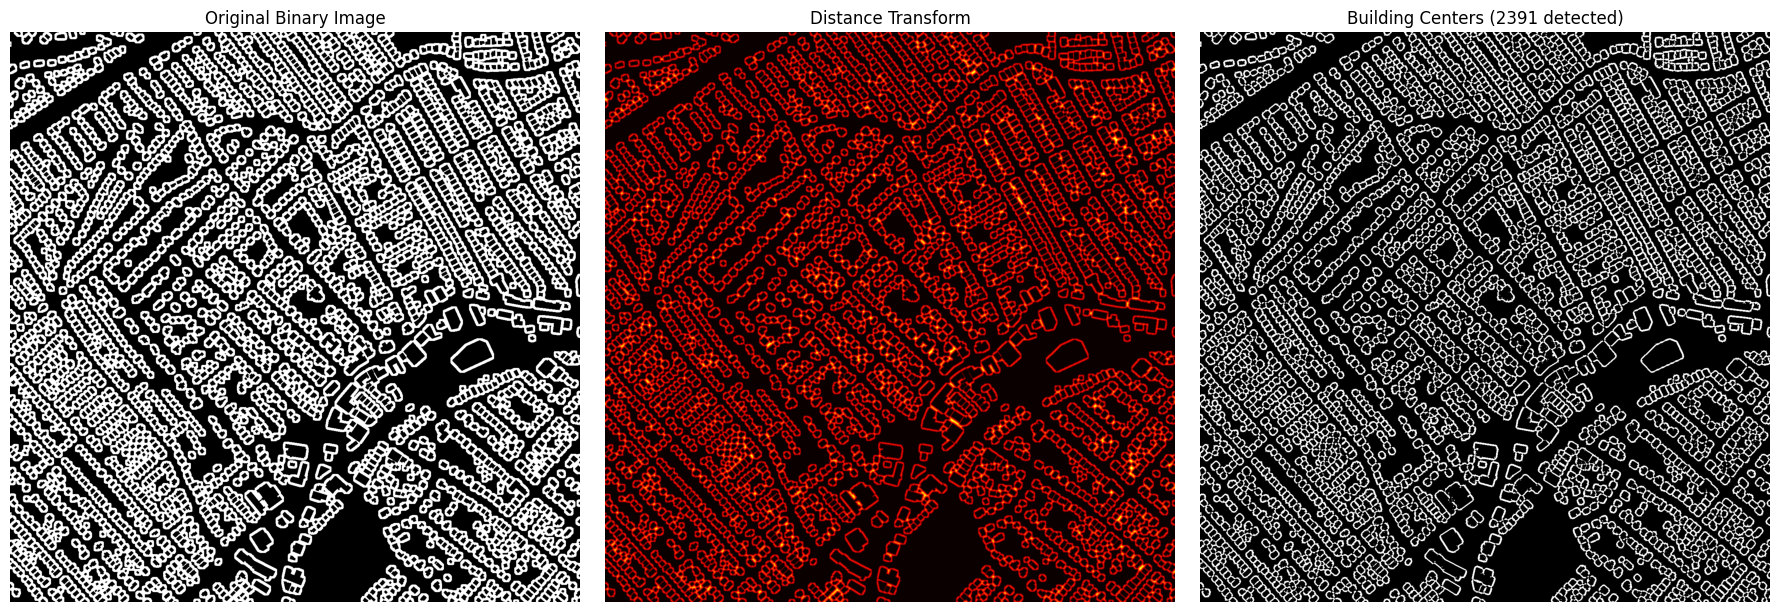


🎯 RESULT: 2391 individual building centers detected using distance transform method!


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("=== METHOD: DISTANCE TRANSFORM BUILDING DETECTION ===")
print("Using distance transform to detect individual building centers...")

# Assuming you have your binary image loaded as 'binary'
# binary = your_binary_image_here

# Method 3: Watershed-like approach using distance transform
print("Distance transform analysis...")

# Calculate distance transform
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# Find local maxima by using morphological operations
kernel_max = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
local_maxima = cv2.morphologyEx(dist_transform, cv2.MORPH_TOPHAT, kernel_max)

# Threshold to get peaks
_, peaks = cv2.threshold(local_maxima, 0.3 * local_maxima.max(), 255, cv2.THRESH_BINARY)
peaks = peaks.astype(np.uint8)

# Find connected components of peaks
num_peaks, peak_labels = cv2.connectedComponents(peaks)

# Number of buildings detected (subtract 1 for background)
buildings_detected = num_peaks - 1

print(f"Buildings detected using distance transform: {buildings_detected}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original binary image
axes[0].imshow(binary, cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

# Distance transform
axes[1].imshow(dist_transform, cmap='hot')
axes[1].set_title('Distance Transform')
axes[1].axis('off')

# Detected peaks (building centers)
axes[2].imshow(peaks, cmap='gray')
axes[2].set_title(f'Building Centers ({buildings_detected} detected)')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"\n🎯 RESULT: {buildings_detected} individual building centers detected using distance transform method!")

=== METHOD 3: NUMBERED BUILDING VISUALIZATION ===
Creating numbered visualization for distance transform detected buildings...
Processing 2391 detected buildings...
Successfully processed 2391 buildings
Successfully processed 2391 buildings


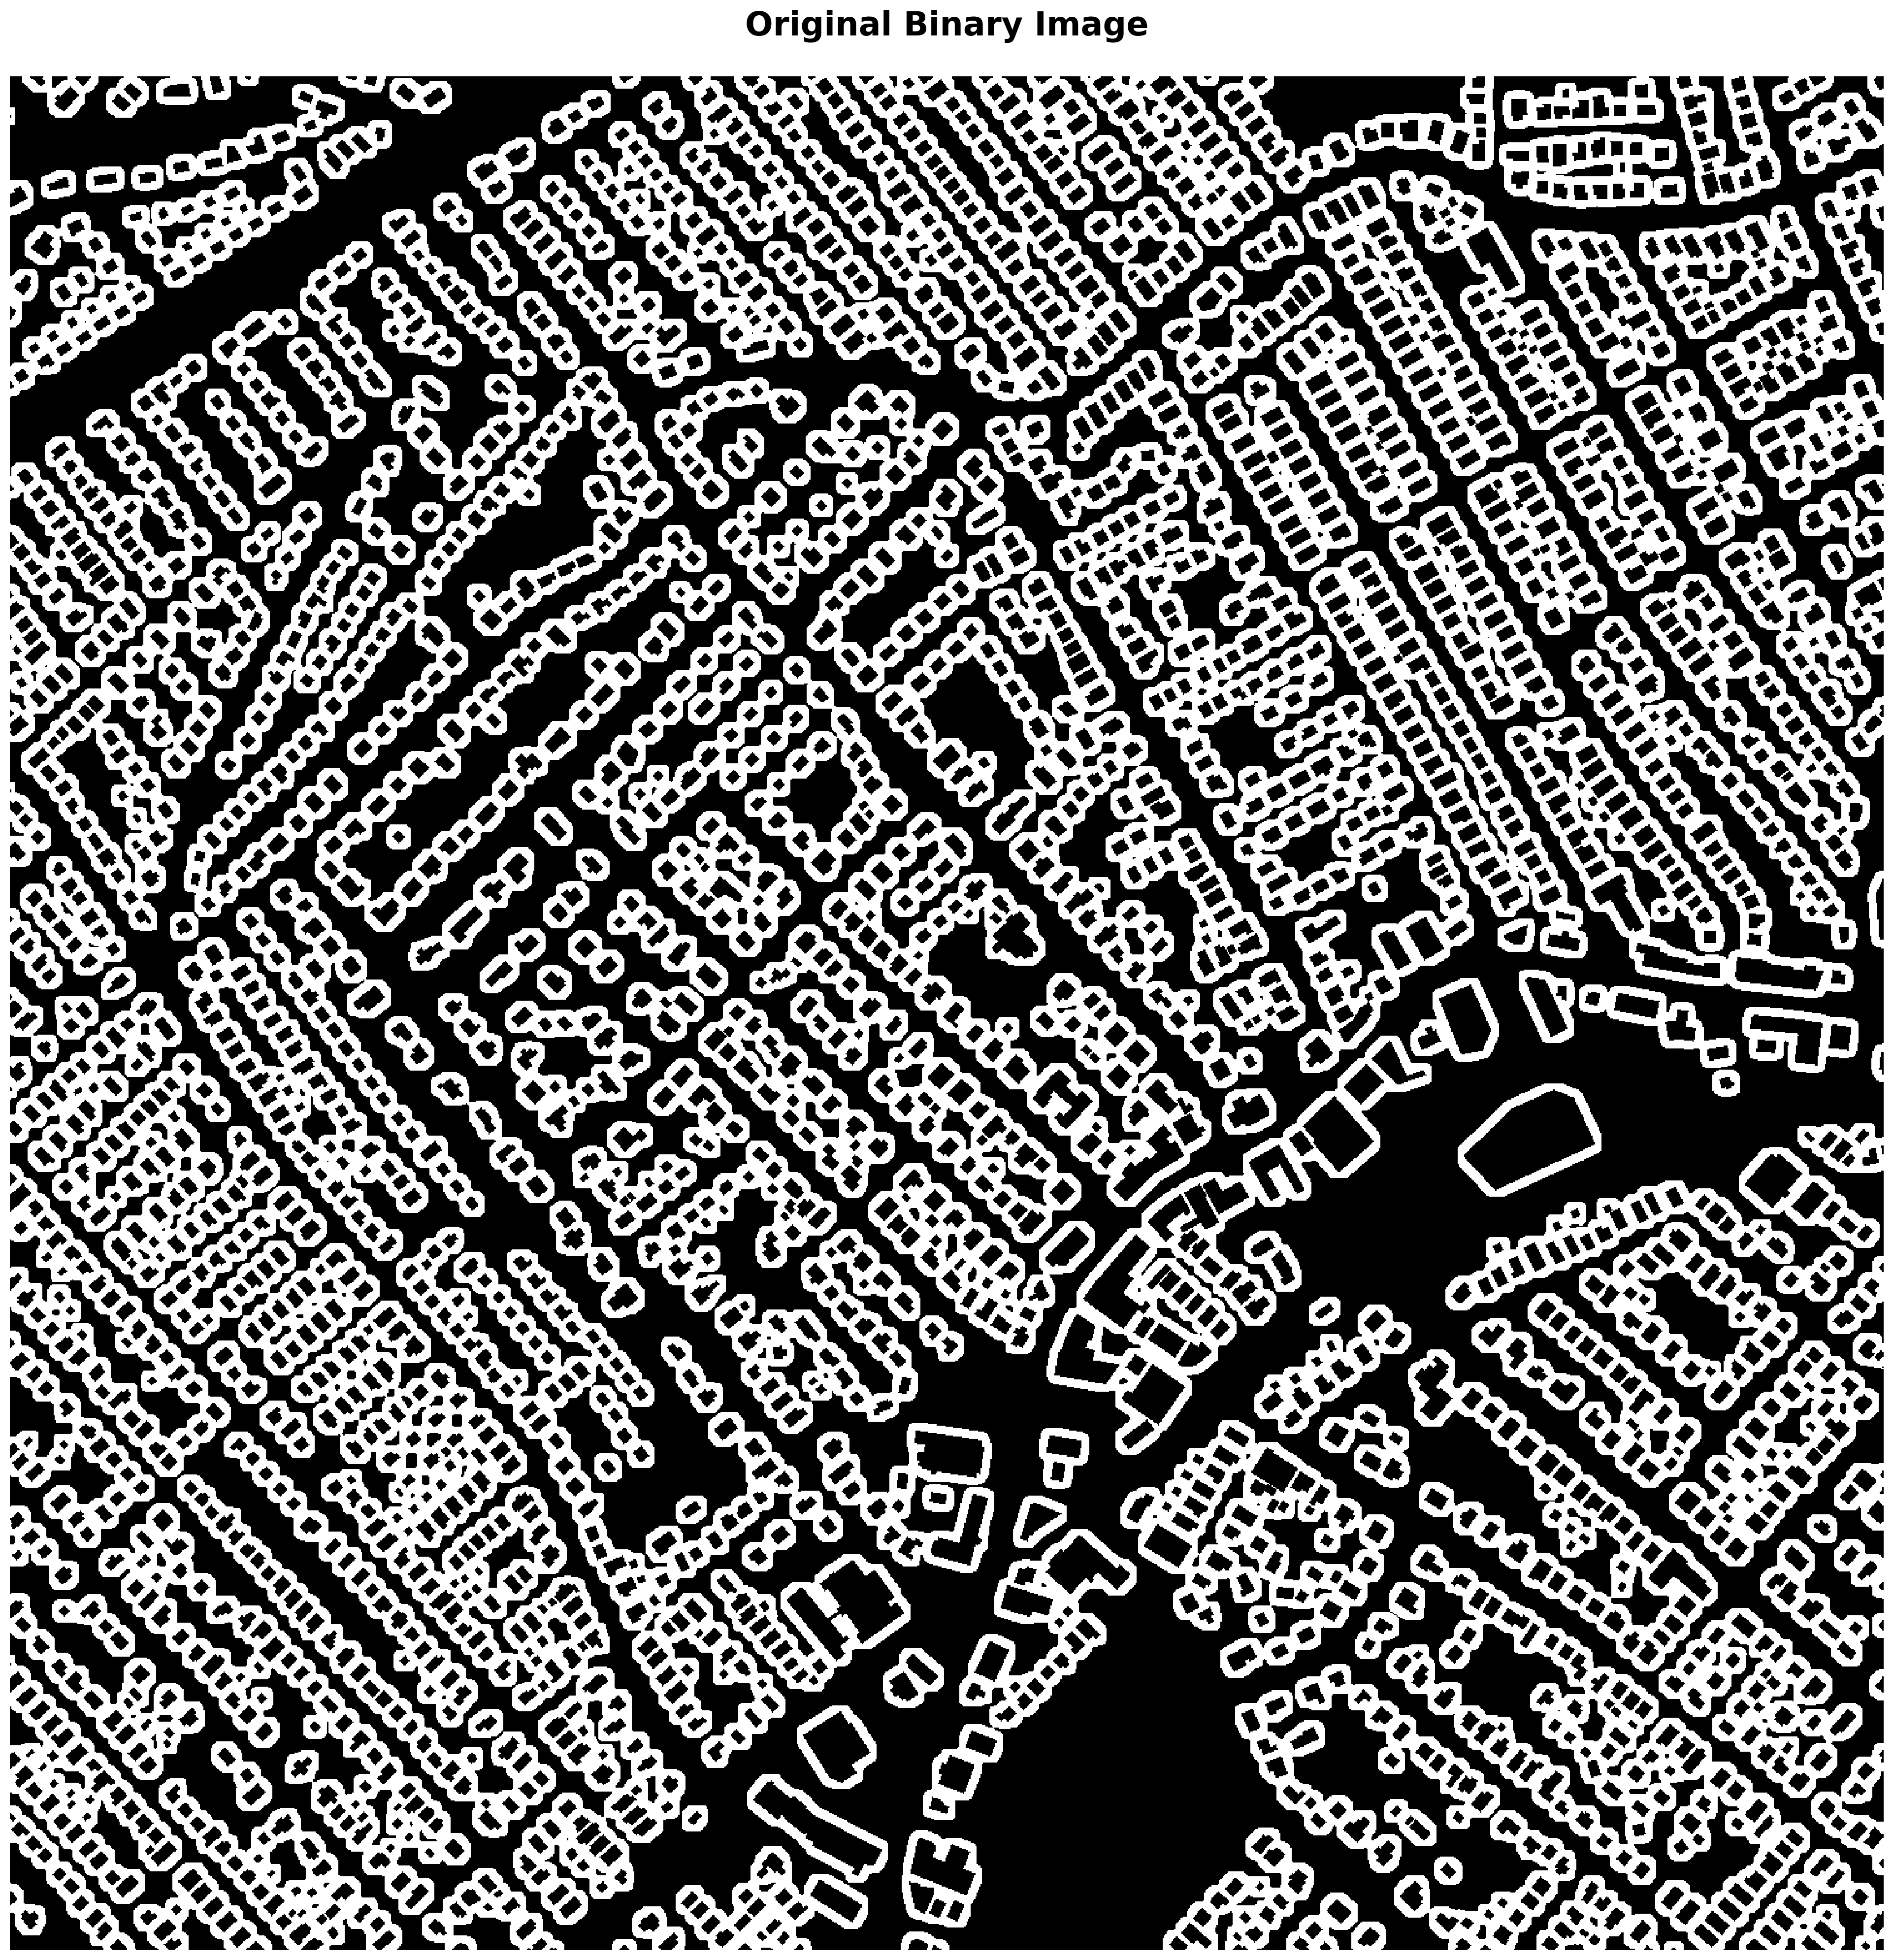

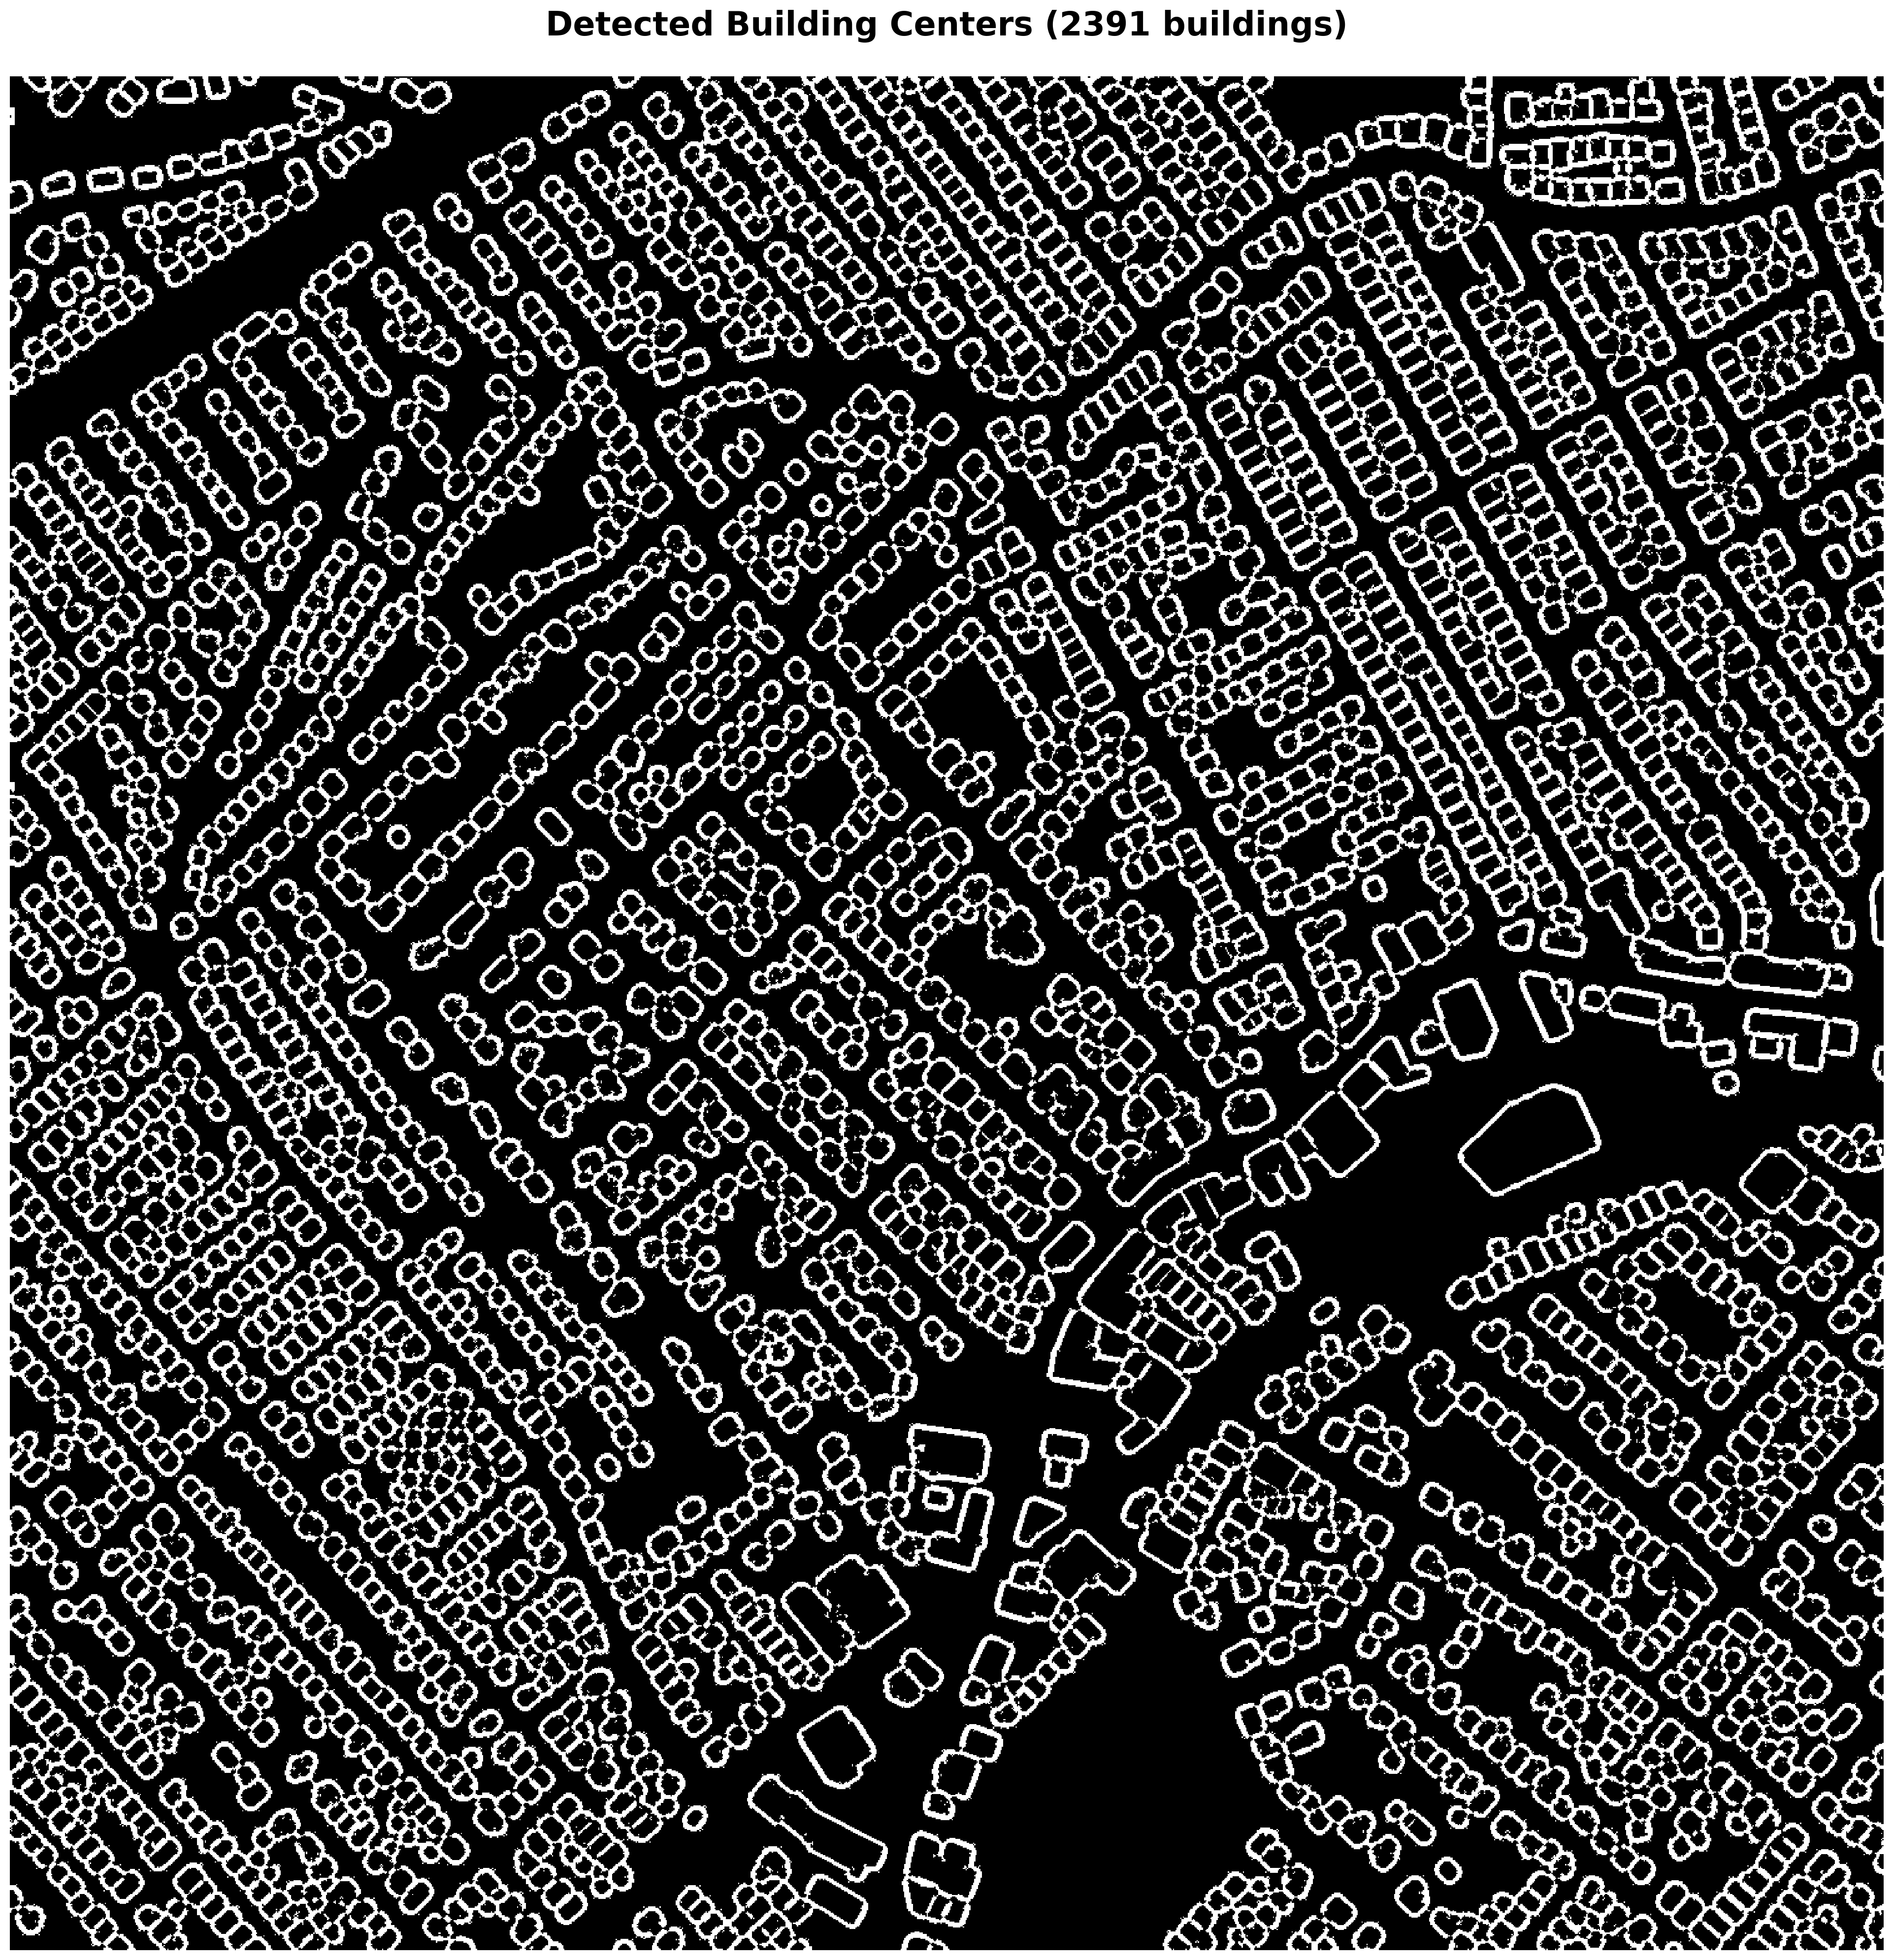

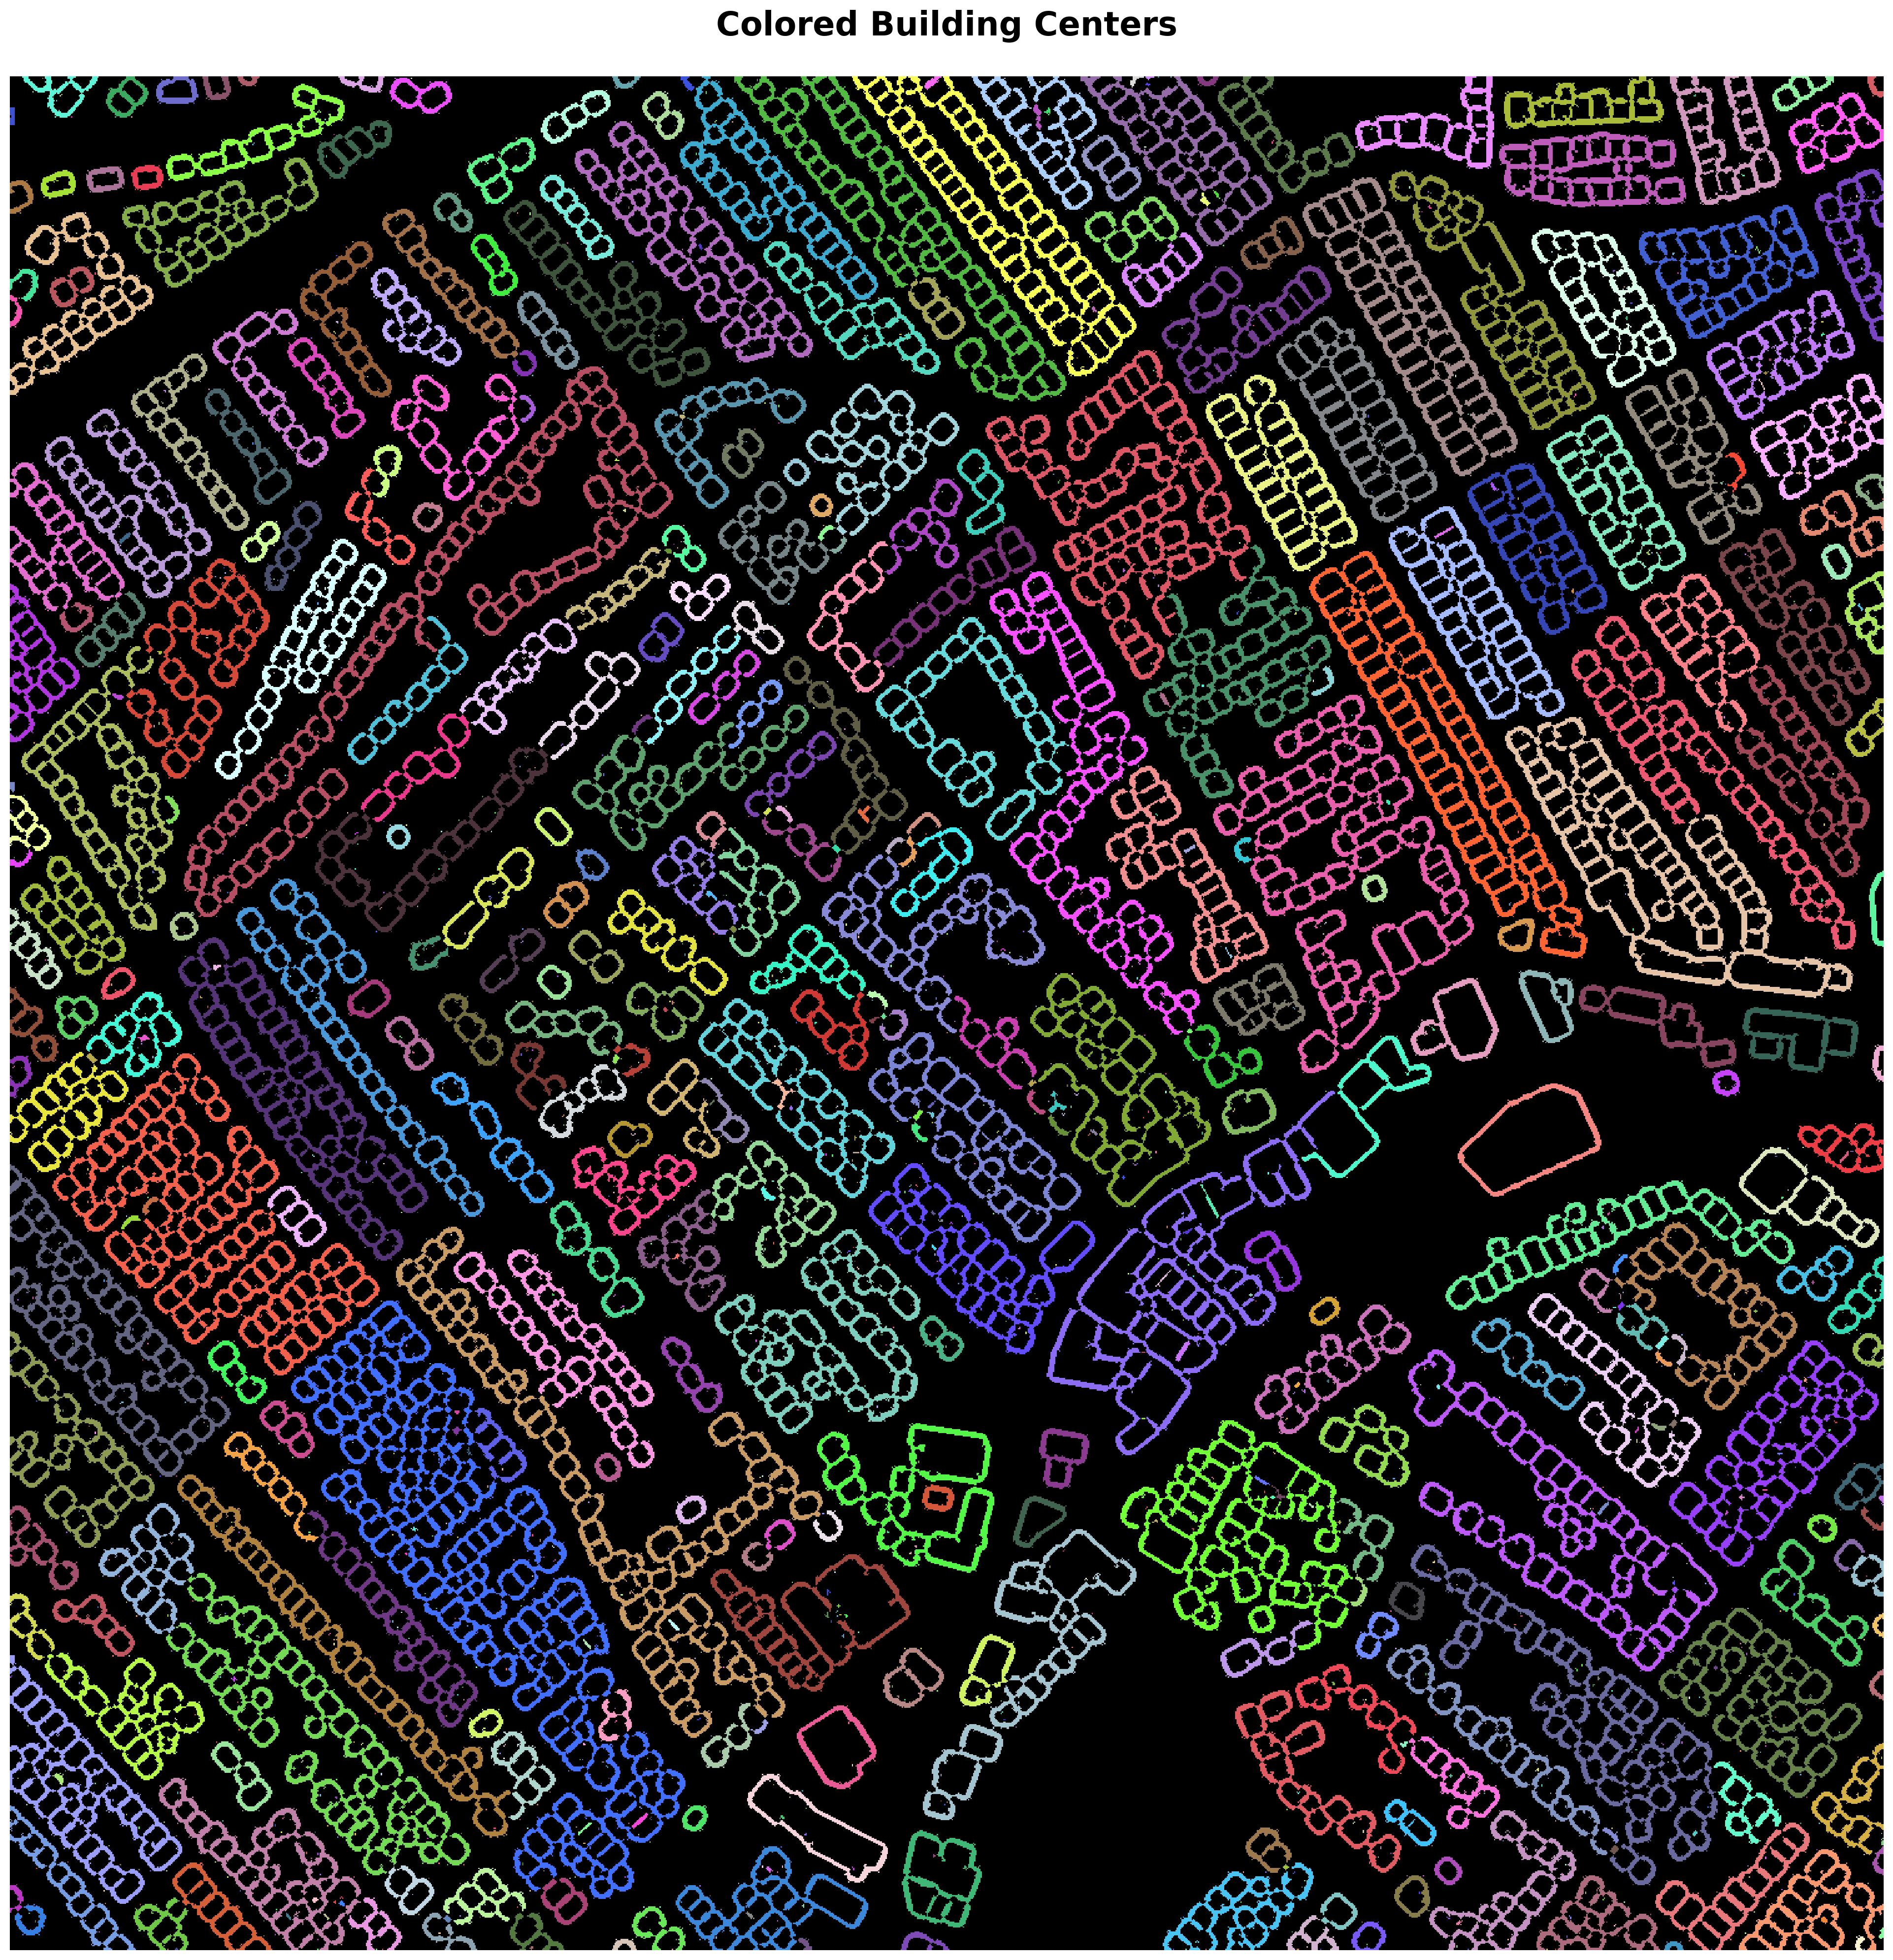

Creating high-quality zoomed sample views...


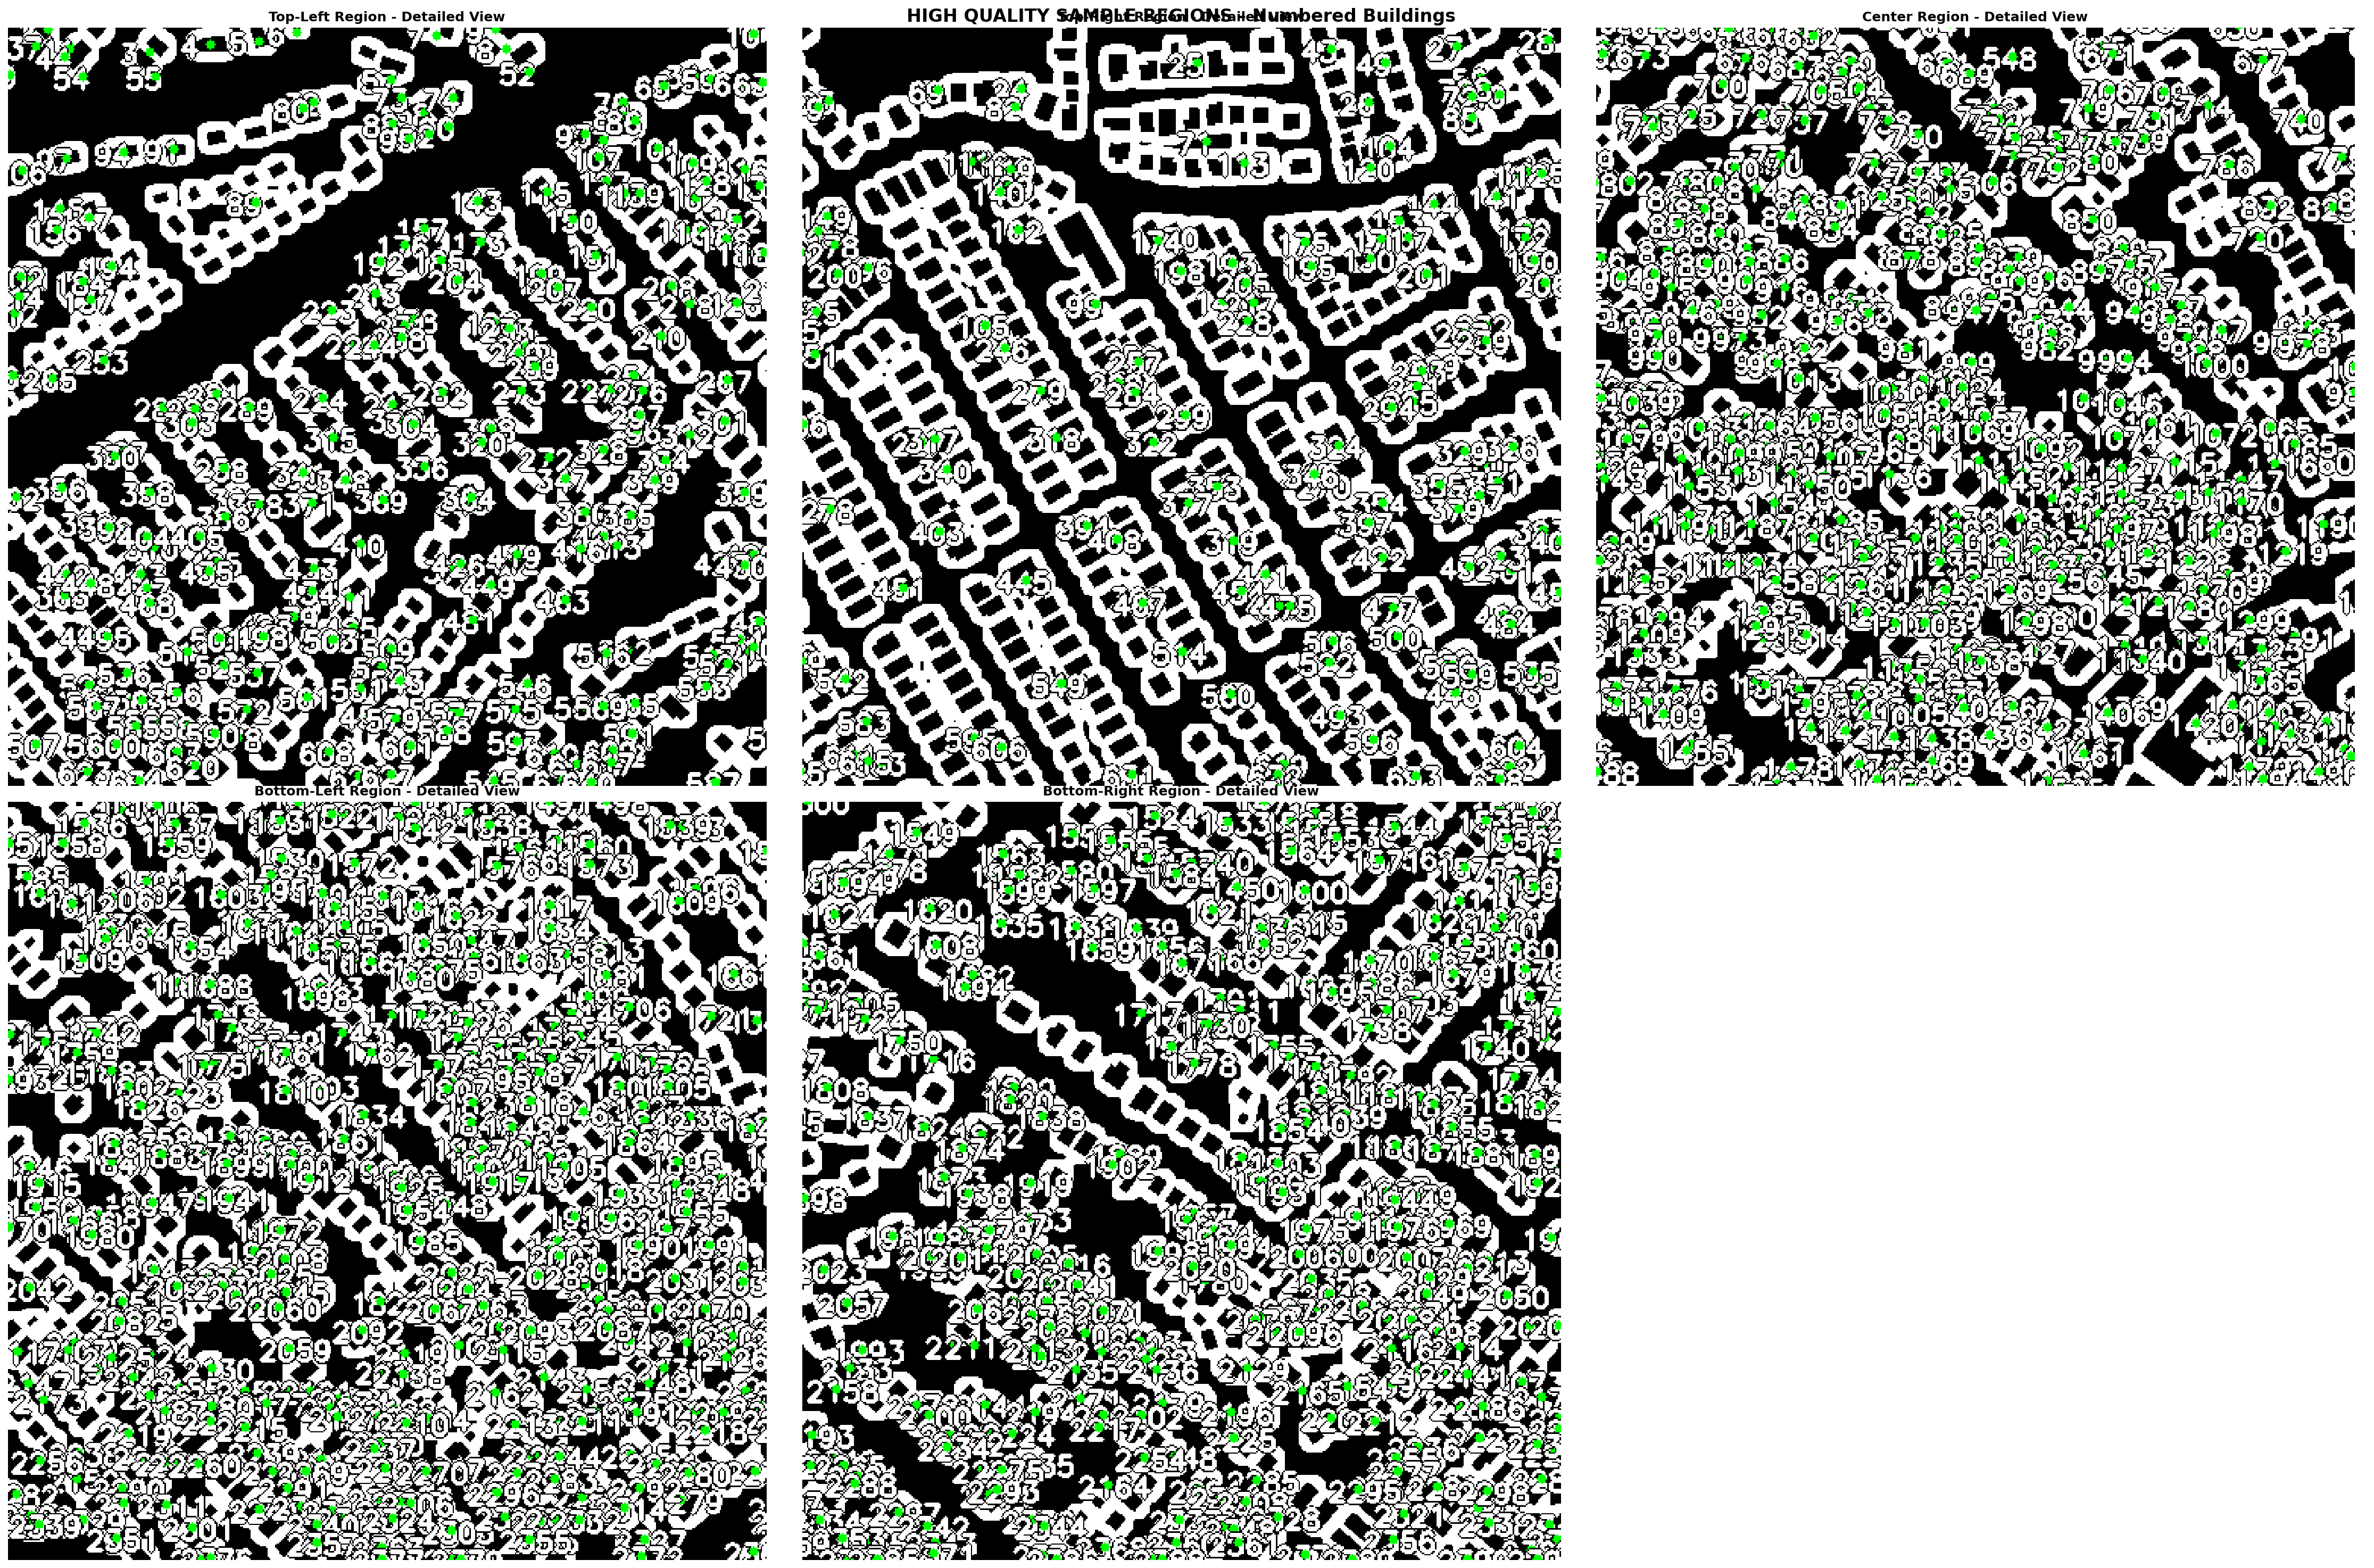


=== BUILDING DETECTION STATISTICS ===
Total buildings detected: 2391
Total building centers found: 2391
Total white pixels in binary image: 946296
Building center pixels: 548678
Coverage: 57.98% of white pixels identified as building centers

🎯 RESULT: All 2391 buildings have been numbered and colored for identification!

First 20 building centers (x, y, label):
  Building 1: Center at (40, 12), Label 1
  Building 2: Center at (26, 1), Label 2
  Building 3: Center at (93, 16), Label 3
  Building 4: Center at (133, 11), Label 4
  Building 5: Center at (165, 9), Label 5
  Building 6: Center at (190, 3), Label 6
  Building 7: Center at (282, 5), Label 7
  Building 8: Center at (328, 14), Label 8
  Building 9: Center at (321, 1), Label 9
  Building 10: Center at (491, 4), Label 10
  Building 11: Center at (541, 5), Label 11
  Building 12: Center at (603, 89), Label 12
  Building 13: Center at (715, 121), Label 13
  Building 14: Center at (795, 112), Label 14
  Building 15: Center at (737,

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

print("=== METHOD 3: NUMBERED BUILDING VISUALIZATION ===")
print("Creating numbered visualization for distance transform detected buildings...")

# Assuming you have already run Method 3 and have:
# - binary: your binary image
# - peaks: the detected building centers
# - peak_labels: connected component labels of peaks
# - num_peaks: number of peaks (buildings + background)

# Create a colored visualization
colored_viz = np.zeros((binary.shape[0], binary.shape[1], 3), dtype=np.uint8)
numbered_viz = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Generate random colors for better visibility
colors = []
for i in range(num_peaks):
    colors.append((
        random.randint(50, 255),
        random.randint(50, 255),
        random.randint(50, 255)
    ))

building_centers = []
building_count = 0

print(f"Processing {num_peaks - 1} detected buildings...")

# Process each building (skip background label 0)
for label in range(1, num_peaks):
    # Find all pixels belonging to this building center
    mask = (peak_labels == label)
    
    if np.any(mask):
        # Get coordinates of this building center
        coords = np.where(mask)
        
        if len(coords[0]) > 0:
            # Calculate centroid of the building center
            cY = int(np.mean(coords[0]))
            cX = int(np.mean(coords[1]))
            
            building_centers.append((cX, cY, label))
            building_count += 1
            
            # Color the building center region
            colored_viz[mask] = colors[label]
            
            # Add number to the visualization with HIGH CONTRAST white color and thick black outline
            text_color = (255, 255, 255)  # Pure white
            outline_color = (0, 0, 0)     # Pure black
            
            # Add thick black outline for maximum visibility
            cv2.putText(numbered_viz, f'{building_count}', (cX-20, cY+8),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, outline_color, 3)  # Thick black outline
            cv2.putText(numbered_viz, f'{building_count}', (cX-20, cY+8),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 2)     # Thick white text
            
            # Draw a larger circle at building center for better visibility
            cv2.circle(numbered_viz, (cX, cY), 3, (0, 255, 0), -1)       # Green center dot

print(f"Successfully processed {building_count} buildings")

# Plot 1: Original Binary Image - High Quality
plt.figure(figsize=(20, 20), dpi=200)
plt.imshow(binary, cmap='gray', interpolation='nearest')
plt.title('Original Binary Image', fontsize=24, fontweight='bold', pad=30)
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot 2: Distance Transform Peaks - High Quality
plt.figure(figsize=(20, 20), dpi=200)
plt.imshow(peaks, cmap='gray', interpolation='nearest')
plt.title(f'Detected Building Centers ({building_count} buildings)', fontsize=24, fontweight='bold', pad=30)
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot 3: Colored Building Centers - High Quality
plt.figure(figsize=(20, 20), dpi=200)
plt.imshow(colored_viz, interpolation='nearest')
plt.title('Colored Building Centers', fontsize=24, fontweight='bold', pad=30)
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot 4: MAIN HIGH QUALITY NUMBERED BUILDINGS
plt.figure(figsize=(25, 25), dpi=300)
plt.imshow(numbered_viz, interpolation='nearest')
plt.title(f'All {building_count} Numbered Buildings - ULTRA HIGH QUALITY', fontsize=28, fontweight='bold', pad=40)
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot 5: EXTREME CLOSE-UP HIGH QUALITY NUMBERED VIEW
plt.figure(figsize=(30, 30), dpi=400)
plt.imshow(numbered_viz, interpolation='nearest')
plt.title(f'MAXIMUM CLARITY: All {building_count} Buildings with White Numbers', fontsize=32, fontweight='bold', pad=50)
plt.axis('off')
plt.tight_layout()
plt.show()

# Create multiple zoomed high-quality sample views for different regions
print("Creating high-quality zoomed sample views...")
h, w = binary.shape

# Define multiple sample regions for better coverage
regions = [
    ("Top-Left", (0, h//3, 0, w//3)),
    ("Top-Right", (0, h//3, 2*w//3, w)),
    ("Center", (h//3, 2*h//3, w//3, 2*w//3)),
    ("Bottom-Left", (2*h//3, h, 0, w//3)),
    ("Bottom-Right", (2*h//3, h, 2*w//3, w))
]

fig, axes = plt.subplots(2, 3, figsize=(30, 20), dpi=150)
axes = axes.flatten()

for i, (region_name, (y1, y2, x1, x2)) in enumerate(regions):
    if i < len(axes):
        sample_region = numbered_viz[y1:y2, x1:x2]
        axes[i].imshow(sample_region, interpolation='nearest')
        axes[i].set_title(f'{region_name} Region - Detailed View', fontsize=12, fontweight='bold')
        axes[i].axis('off')

# Hide the extra subplot
if len(regions) < len(axes):
    axes[-1].axis('off')

plt.suptitle('HIGH QUALITY SAMPLE REGIONS - Numbered Buildings', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print(f"\n=== BUILDING DETECTION STATISTICS ===")
print(f"Total buildings detected: {building_count}")
print(f"Total building centers found: {len(building_centers)}")

# Calculate pixel coverage
total_white_pixels = np.sum(binary == 255)
peak_pixels = np.sum(peaks == 255)
coverage_percentage = (peak_pixels / total_white_pixels) * 100 if total_white_pixels > 0 else 0

print(f"Total white pixels in binary image: {total_white_pixels}")
print(f"Building center pixels: {peak_pixels}")
print(f"Coverage: {coverage_percentage:.2f}% of white pixels identified as building centers")

print(f"\n🎯 RESULT: All {building_count} buildings have been numbered and colored for identification!")

# Save building center coordinates for reference
print(f"\nFirst 20 building centers (x, y, label):")
for i, (x, y, label) in enumerate(building_centers[:20]):
    print(f"  Building {i+1}: Center at ({x}, {y}), Label {label}")

if len(building_centers) > 20:
    print(f"  ... and {len(building_centers) - 20} more buildings")